In [28]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

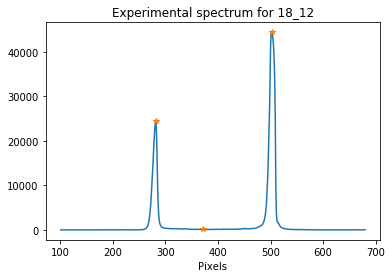

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


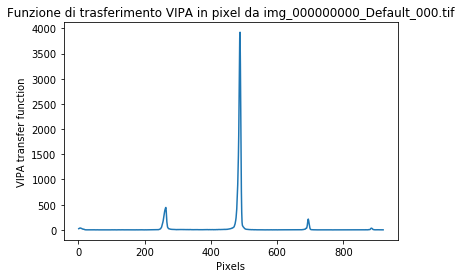

[ 9.65594053  5.26459666 11.99392113]


In [57]:
#1 ) Acquisizione Spettro e VIPA

y   =   loadmat('../Claudia/DaticellBoniPuntiDoppi/20191218_K27M')
y   =   y['y'][6][45]

y   =   y[:,0]


syg_kwargs   =   {'height': 40, 'distance': 23, 'width': 4.}

Data     =   Exp.Spectrum('18_12')
Data.Get_Spectrum(y = y, offset = 183., cut = True, cut_range = (100, 680), fig = 'Spectrum_Pix', **syg_kwargs)
Data.Get_VIPA_tif(tif_filename = 'img_000000000_Default_000.tif', path ='../Claudia/DaticellBoniPuntiDoppi/picchi_elastici_con_filtro_100msexp/Pos0/', fig = 'VIPA_Pix', save_path = '')
print(Data.peaks[1]['widths'])



 Ho trovato 5 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 200.00 
 Spessore > 0.60 



 Il picco 1 ha: 	 indice = 181 	 x_value (Pix) = -220.00 	 ampiezza(Pix) = 9.63 	 altezza = 20168.00 


 Il picco 2 ha: 	 indice = 210 	 x_value (Pix) = -191.00 	 ampiezza(Pix) = 0.90 	 altezza = 241.11 


 Il picco 3 ha: 	 indice = 347 	 x_value (Pix) = -54.00 	 ampiezza(Pix) = 0.62 	 altezza = 253.11 


 Il picco 4 ha: 	 indice = 372 	 x_value (Pix) = -29.00 	 ampiezza(Pix) = 0.67 	 altezza = 392.56 


 Il picco 5 ha: 	 indice = 401 	 x_value (Pix) = 0.00 	 ampiezza(Pix) = 11.17 	 altezza = 41995.67 



{'n_peaks': 5,
 'peaks_idx': array([181, 210, 347, 372, 401], dtype=int64),
 'peaks_width': array([ 9.62702106,  0.90055249,  0.62053571,  0.66910867, 11.16815536]),
 'peak_heights': array([20168.        ,   241.11111111,   253.11111111,   392.55555556,
        41995.66666667])}

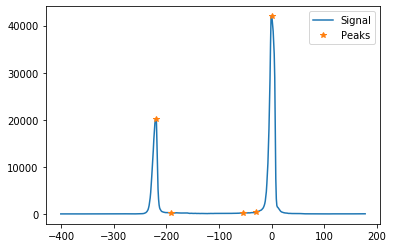

In [49]:
syg_kwargs   =   {'height': 200, 'distance': 23, 'width': .6}
Analyze_Peaks(Data.x_pix, Data.y, 'Pix' , **syg_kwargs, verbose=True, fig = True)

(0, 1000)

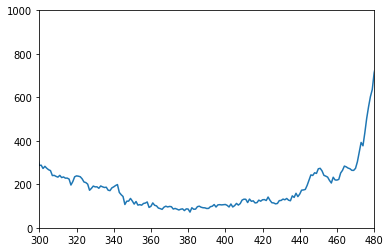

In [17]:
plot(Data.x_pix, Data.y)
plt.xlim(300, 480)
plt.ylim(0,1000)

In [5]:
Data.Check_Spectrum(saturation_width = 15.)
Data.Get_Spectrum_4_Peaks()
Data.Knowing_VIPA_Peaks()

TypeError: Find_Highest_n_peaks() got an unexpected keyword argument 'height'

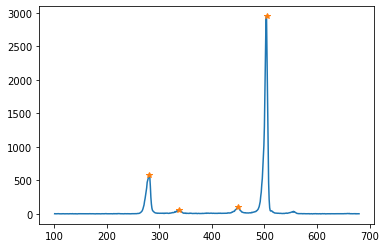

In [6]:
plot(Data.x_pix, Data.y)
plot(Data.x_pix[Data.peaks['peaks_idx']], Data.y[Data.peaks['peaks_idx']], '*')

In [24]:
peaks = Find_Highest_n_peaks(Data.y_VIPA, 5, height = 10., distance = 15, width = 1.)
plot(Data.x_VIPA, Data.y_VIPA)
plot(Data.x_VIPA[Data.VIPA_peaks['peaks_idx']], Data.y_VIPA[Data.VIPA_peaks['peaks_idx']], '*')

TypeError: Find_Highest_n_peaks() got an unexpected keyword argument 'height'



 Ho trovato 5 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 32.93 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 4 	 x_value (Pix) = 5.00 	 ampiezza(Pix) = 5.94 	 altezza = 38.17 


 Il picco 2 ha: 	 indice = 263 	 x_value (Pix) = 264.00 	 ampiezza(Pix) = 9.57 	 altezza = 444.80 


 Il picco 3 ha: 	 indice = 487 	 x_value (Pix) = 488.00 	 ampiezza(Pix) = 6.34 	 altezza = 3921.86 


 Il picco 4 ha: 	 indice = 693 	 x_value (Pix) = 694.00 	 ampiezza(Pix) = 5.70 	 altezza = 214.13 


 Il picco 5 ha: 	 indice = 883 	 x_value (Pix) = 884.00 	 ampiezza(Pix) = 6.38 	 altezza = 33.54 



{'n_peaks': 5,
 'peaks_idx': array([  4, 263, 487, 693, 883], dtype=int64),
 'peaks_width': array([5.9409908 , 9.57317612, 6.33613473, 5.69799141, 6.38191032]),
 'peak_heights': array([  38.17105263,  444.80263158, 3921.85526316,  214.13157895,
          33.53947368])}

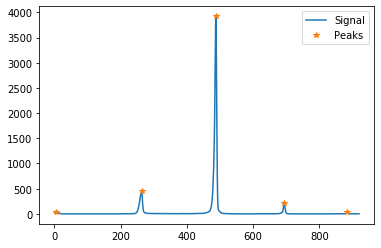

In [31]:
#2) Analizzo questi Spettri per capire come gestire le funzioni dopo
Data.How_Many_Peaks_To_VIPA(treshold = 30)
Analyze_Peaks(Data.x_VIPA, Data.y_VIPA, 'Pix', verbose=True, fig = True, height = Data.GHz_fit_height, width = 0.00001, distance = Data.VIPA_peaks_dist)

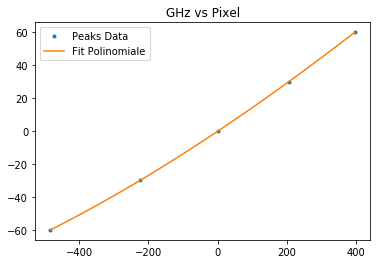

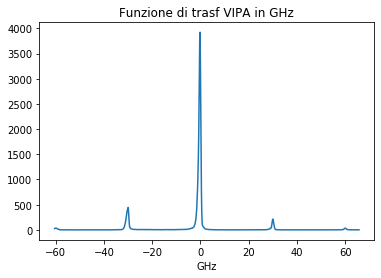

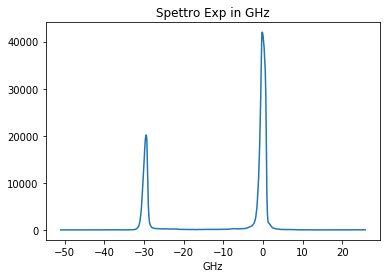

In [32]:
#3 converto tutto in GHz
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig=True)
Data.Spectrum_Pix2GHz(fig=True)

Ho trovato valore dell'altezza per avere 4 picchi: 64.305556
 (array([180, 237, 350, 403], dtype=int64), {'plateau_sizes': array([1, 1, 1, 1], dtype=int64), 'left_edges': array([180, 237, 350, 403], dtype=int64), 'right_edges': array([180, 237, 350, 403], dtype=int64), 'peak_heights': array([1601.55555556,   64.33333333,  102.61111111, 7620.61111111]), 'prominences': array([1594.16666667,   47.61111111,   77.83333333, 7620.61111111]), 'left_bases': array([ 50, 208, 282,  50], dtype=int64), 'right_bases': array([282, 282, 365, 546], dtype=int64), 'widths': array([ 9.12547388, 10.5172516 ,  8.96250715,  6.24467957]), 'width_heights': array([ 804.47222222,   40.52777778,   63.69444444, 3810.30555556]), 'left_ips': array([173.70020711, 230.71518987, 343.86651584, 399.21828051]), 'right_ips': array([182.82568099, 241.23244147, 352.82902299, 405.46296007])})


 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 64.31 
 Spessore > 1.00 



 Il picco 1

"\nplt.figure()\nplot(Data.x_pix[402], Data.y[402], '*')\nplot(Data.x_pix[348], Data.y[348], '*')\n\n"

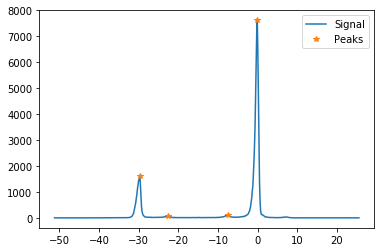

In [63]:
Data.How_Many_Peaks_To(distance =23, width = 1.,  treshold = 5, fig = True, verbose = True)
#plot(Data.y)
"""
plt.figure()
plot(Data.x_pix[402], Data.y[402], '*')
plot(Data.x_pix[348], Data.y[348], '*')

"""



 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 60.00 
 Spessore > 1.00 



 Il picco 1 ha: 	 indice = 180 	 x_value (GHz) = -29.78 	 ampiezza(GHz) = 9.13 	 altezza = 1601.56 


 Il picco 2 ha: 	 indice = 237 	 x_value (GHz) = -22.51 	 ampiezza(GHz) = 10.52 	 altezza = 64.33 


 Il picco 3 ha: 	 indice = 350 	 x_value (GHz) = -7.45 	 ampiezza(GHz) = 8.96 	 altezza = 102.61 


 Il picco 4 ha: 	 indice = 403 	 x_value (GHz) = -0.11 	 ampiezza(GHz) = 6.24 	 altezza = 7620.61 



{'n_peaks': 4,
 'peaks_idx': array([180, 237, 350, 403], dtype=int64),
 'peaks_width': array([ 9.12547388, 10.5172516 ,  8.96250715,  6.24467957]),
 'peaks_height': array([1601.55555556,   64.33333333,  102.61111111, 7620.61111111])}

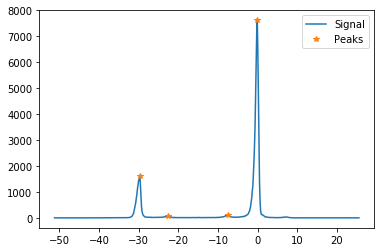

In [62]:
Analyze_Peaks(Data.x_freq, Data.y, 'GHz', height = 60, distance = 20, width = 1, fig = True, verbose = True)



Ho stimato 7 parametri iniziali per il fit che andrai a fare

Omega  = 10.610 

Gamma  = 0.113 

offset  = 405.839 

Co  = 1.000 

shift  = 0.000 

delta_amplitude  = 1.000 

delta_width  = 0.500 



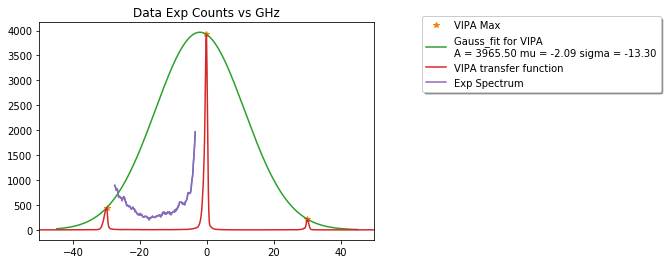

In [22]:
#4)Eseguo taglio dello Spettro sui picchi Brillouin
# e stimo gaussiana inviluppo dai dati VIPA

Data.Cut_n_Estimate_Spectrum(cut = True, distanza = 0.2, verbose = True)
plt.figure()
plot(Data.x_freq, Data.y)
plt.title('Data Exp Counts vs GHz')


Data.Fit_VIPA_Gaussian(fig = True)


Secondi impiegati per conv =  0.28125


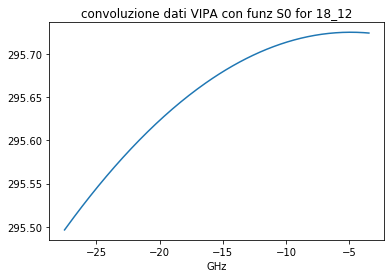

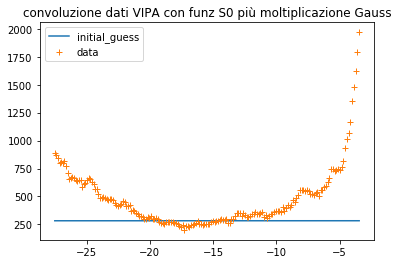

In [23]:
#5) Stimo parametri iniziali con un fit ridotto
#5A) piccola prova iniziale
p0  =   pd.DataFrame(Data.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))


start = time.process_time()
_ = Data.Gauss_Convolve_Markovian_Response(Data.p0.values[0], fig = True, compare = True)
print("Secondi impiegati per conv = ", time.process_time()-start)
#_ = Data.Gauss_Convolve_Theoretical_Response(Data.p0.values[0], fig = True)


Assumo vettore dei parametri iniziali da quelli stimati
 [ 1.00000000e+00  1.06096740e+01  1.13323700e-01  5.00000000e-01
  1.00000000e+00  3.96550288e+03 -2.08588386e+00 -1.33013330e+01
  0.00000000e+00  4.05838889e+02] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4678e+07                                    2.07e+07    
       1              2         9.9701e+06      4.71e+06       3.70e-01       4.79e+06    
       2              6         8.0954e+06      1.87e+06       4.04e-01       1.82e+06    
       3              7         4.3714e+06      3.72e+06       8.16e-01       1.06e+07    
       4              8         1.2098e+06      3.16e+06       1.65e+00       6.59e+05    
       5              9         1.0726e+06      1.37e+05       3.32e+00       1.48e+06    
       6             10         9.7043e+05      1.02e+05       6.57e+00       1.46e+04    
       7             11         8.4250e+05      

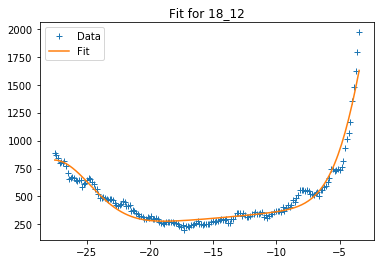

In [24]:
#5B) faccio er fit con modello markoviano 
bounds_down     =    [0,Get_Around(p0['Omega'][0], 0.1)[0],0,0,0, Get_Around(p0['A'][0], 0.1)[0], Get_Around(p0['mu'][0], 0.1)[0], Get_Around(p0['sigma'][0], 0.1)[0], -np.inf, -np.inf]
bounds_up       =    [np.inf, Get_Around(p0['Omega'][0], 0.1)[1],np.inf, np.inf, np.inf, Get_Around(p0['A'][0], 0.1)[1], Get_Around(p0['mu'][0], 0.1)[1], Get_Around(p0['sigma'][0], 0.1)[1], np.inf, np.inf]
Data.Non_Linear_Least_Squares_Markov(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True, bound = (bounds_down, bounds_up), ftol = None)

Co     Omega     Gamma  delta_width  delta_amplitude            A  \
0  1.0  9.452101  0.447158          0.5              1.0  3965.502877   

         mu      sigma  shift      offset  
0 -2.085884 -13.301333    0.0  142.870241  
              Co     Omega     Gamma     Delta    tau  delta_width  \
Values  0.206403  8.506891  0.454533  0.454533  100.0     1.899443   

        delta_amplitude            A        mu      sigma     shift    offset  
Values         0.401702  3822.428844 -2.294472 -14.631466  1.144664  82.88049  
              Co     Omega     Gamma     Delta    tau  delta_width  \
Values  0.206403  8.506891  0.454533  0.454533  100.0     1.899443   

        delta_amplitude            A        mu      sigma     shift    offset  
Values         0.401702  3822.428844 -2.294472 -14.631466  1.144664  82.88049  
Valore stimato della cost function prima del fit:
33504.79617477984


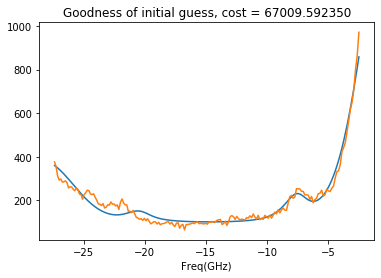

In [15]:
#6) je passo i risultati
Data.Estimate_Initial_Parameters()
print(Data.p0)
_ = Data.Take_A_Look_Before_Fitting()



Assumo vettore dei parametri iniziali da quelli stimati
 [ 1.11581376e-01  1.03973115e+01  6.06152624e+00  6.06152624e+00
  1.00000000e+02  1.64987305e+00  5.61652413e+00  4.02998744e+03
 -1.87729662e+00 -1.19711997e+01  3.99571374e-01 -5.21105773e+01] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2255e+04                                    4.73e+01    
       1              2         1.2218e+04      3.67e+01       8.07e+01       9.40e+02    
       2              4         1.2096e+04      1.22e+02       7.81e+01       2.76e+03    
       3              7         1.1967e+04      1.29e+02       2.71e+00       1.17e+03    
       4              8         1.1943e+04      2.34e+01       1.64e+01       5.04e+02    
       5             10         1.1894e+04      4.95e+01       1.00e+00       3.90e+02    
       6             12         1.1887e+04      6.79e+00       4.32e-01       1.66e+02    
       7        

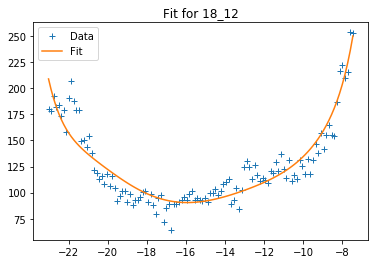

In [10]:
#7) faccio er fit markoviano +  rilassamento exp

Lower = Get_Around(Data.p0.values, 0.1)[0][0]

Upper= Get_Around(Data.p0.values, 0.1)[1][0]
Lower = np.concatenate((Lower[0:3], [0], [0], Lower[5:]))
Upper = np.concatenate((Upper[0:3], [np.inf], [np.inf], Upper[5:]))
Data.Non_Linear_Least_Squares(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True,  bound = (Lower, Upper))




In [11]:
Data.Fit_Params

,Co,Omega,Gamma,Delta,tau,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.100423,9.635092,5.455374,133.382843,2.794691,1.646372,5.594261,4.044956e+03,-1.693535,-11.311610,0.396924,-57.321499
StdErrs,0.284549,56.916972,8.102658,21619.698990,429.634639,0.176553,3.748041,2.043309e+08,212.169007,25.596341,4.531047,130.849827
Initials,0.111581,10.397312,6.061526,6.061526,100.000000,1.649873,5.616524,4.029987e+03,-1.877297,-11.971200,0.399571,-52.110577


[2950.5         576.           97.05555556   52.33333333]


array([ 576.        ,   52.33333333,   97.05555556, 2950.5       ])

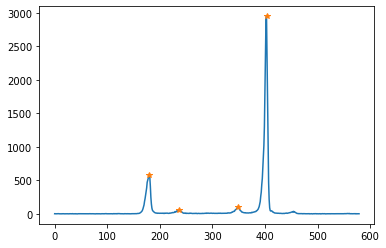

In [15]:
pk = find_peaks(Data.y, height = 20., distance = 15, width = 1.)
temp    =   np.flip(pk[1]['peak_heights'].argsort())
temp    =   temp[:4]
print(pk[1]['peak_heights'][temp])
plt.plot(Data.y)
plt.plot(pk[0][temp], Data.y[pk[0][temp]], '*')
pk[1]['peak_heights'][:4]